In [ ]:
from connect_four_env.connect_four_env import ConnectFourGymEnv

In [ ]:
env = ConnectFourGymEnv()

done = False
while not done:
    action = env.action_space.sample()
    valid = False
    while not valid:
        try:
            env._get_fall_row(action[0])
            env._get_fall_row(action[1])
            valid = True
        except:
            action = env.action_space.sample()
    state, reward, done, info = env.step(action, True)
env.render_history()

In [ ]:
env.board.shape

In [ ]:
from game.episode import run_episode
from connect_four_env.connect_four_env import ConnectFourGymEnv
from agents.random_agent import RandomAgent

env = ConnectFourGymEnv()

_ = run_episode(RandomAgent(env.PLAYER1, env.board.shape), RandomAgent(env.PLAYER2, env.board.shape), env, True)

In [ ]:
env.render_history()

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from game.episode import run_episode_against_self
from connect_four_env.connect_four_env import ConnectFourGymEnv
from agents.deep_v_agent import DeepVAgent

env = ConnectFourGymEnv()

agent = DeepVAgent(5, env.PLAYER1, .1, env.board.shape)

_ = run_episode_against_self(agent, env, True)

In [ ]:
env.render_history()

In [74]:
from game.train import train_against_self

agent = DeepVAgent(10, env.PLAYER1, .1, env.board.shape)

win_rate, losses = train_against_self(1.0, 1000, agent, 100)

 67%|██████▋   | 668/1000 [00:22<00:06, 49.20it/s]

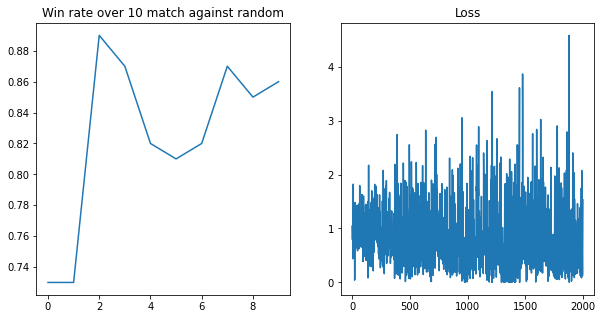

In [73]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(win_rate)
ax[0].set_title("Win rate over 100 match against random (every 100 episode)")
ax[1].plot(losses)
ax[1].set_title("Loss")
plt.show()

In [67]:
env = ConnectFourGymEnv()

run_episode(agent, RandomAgent(env.PLAYER2, env.board.shape), env, keep_history=True)

In [68]:
env.render_history()

interactive(children=(IntSlider(value=0, description='turn', max=12), Output()), _dom_classes=('widget-interac…